<a href="https://colab.research.google.com/github/Rocknroll-nerd/algo_hw/blob/master/sort_algo_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement bubble sort and measure its performance for various list
sizes.
Plot the dependence of working time on the list size. Compare with the
execution time of the built-in function sort in class list.


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
#for prettier random nums
random.seed(42)

In [ ]:
#func that helps to count time
def timed(f, args):
  start = time.time()
  ret = f(args)
  elapsed = time.time() - start
  return ret, elapsed

In [ ]:
arr = [random.randint(1, 10000) for i in range(10000)]
arr[0:10]

[1825, 410, 4507, 4013, 3658, 2287, 1680, 8936, 1425, 9675]

In [ ]:
def bubbleSort(arr): 
    n = len(arr) 
    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 

timed(bubbleSort, arr)
#for 10000 elements

(None, 7.681139945983887)

In [ ]:
def timeBubble():
  plotTimeForBubble= []
  listOfEls= [i for i in range(10000)]
  for f in range(1000):
      x = timed(bubbleSort, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeForBubble.append(x)
  plt.style.use('ggplot')    
  plt.plot(listOfEls[0:1000], plotTimeForBubble)

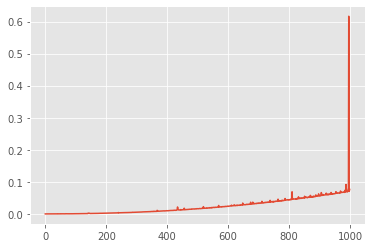

In [ ]:
timeBubble()

In [ ]:
def sorting(arr):
  arr.sort()

In [ ]:
def timeSort():
  plotTimeForSort= []
  listOfEls= [i for i in range(1000)]
  for f in range(1000):
      x = timed(sorting, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeForSort.append(x)
  plt.style.use('ggplot')    
  plt.plot(listOfEls, plotTimeForSort)

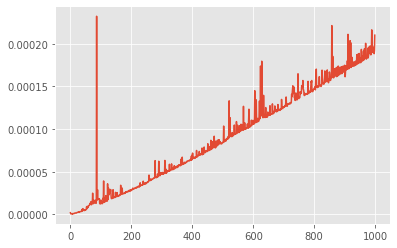

In [ ]:
#bubblesort is growing much faster
#list.sort() is better for sorting elements than bubble
timeSort()


2. Implement quicksort and measure its performance for various list
sizes.
Plot the dependence of working time on the list size. Compare with the
execution time of bubble sort and with the built-in function sort in
class list.

In [ ]:
#algo of quicksort
def quick(arr):
   if len(arr) <= 1:
       return arr
   else:
       q = random.choice(arr)
       s_arr = []
       m_arr = []
       e_arr = []
       for n in arr:
           if n < q:
               s_arr.append(n)
           elif n > q:
               m_arr.append(n)
           else:
               e_arr.append(n)
       return quick(s_arr) + e_arr + quick(m_arr)

arr=[7, 10, 12, 35, 2, 14, 8, 169]
quick(arr)

[2, 7, 8, 10, 12, 14, 35, 169]

In [ ]:
def timeQuick():
  plotTimeForSort= []
  listOfEls= [i for i in range(1000)]
  for f in range(1000):
      x = timed(quick, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeForSort.append(x)
  plt.style.use('ggplot')    
  plt.plot(listOfEls, plotTimeForSort)

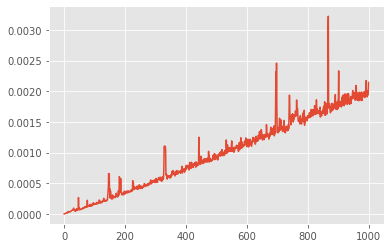

In [ ]:
timeQuick()

In [ ]:
def compare():
  plotTimeSort= []
  plotTimeBub= []
  plotTimeQuick = []
  listOfEls= [i for i in range(1000)]
  for f in range(len(listOfEls)):
      quick_timer = timed(quick, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeQuick.append(quick_timer)
      bub_timer = timed(bubbleSort, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeBub.append(bub_timer)
      sort_timer = timed(sorting, [random.randint(1,10000) for f in range(listOfEls[f])])[1]
      plotTimeSort.append(sort_timer)
  plt.style.use('ggplot')    
  plt.plot(listOfEls, plotTimeSort)
  plt.plot(listOfEls, plotTimeBub)
  plt.plot(listOfEls, plotTimeQuick)


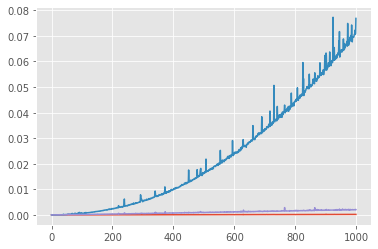

In [ ]:
#bubbleSort is the slowest algorythm, quick sorting is a bit slower than built-in sort function 
compare()

3. Implement Depth first graph search (DFS), use append and pop methods of the class list to implement a stack.

In [ ]:
class Node:
   def __init__(self, value):
      self.value = value
      self.adjN = []

def buildGraph(vertexNames, edges):
   vertices = dict([(vertexNames[i], Node(vertexNames[i])) for i in range(len(vertexNames))])
   for name in vertices:
      vertices[name].value = name
   for (v,w) in edges:
      vertices[v].adjN.append(vertices[w])
   return vertices[vertexNames[0]]


In [ ]:
def depthFirst(start, value):
   visited = []
   stack = [start]

   while len(stack) > 0:
      node = stack.pop()
      if node in visited:
         continue
      visited.append(node)
      if node.value == value:
         return True

      for n in node.adjN:
         if n not in visited:
            stack.append(n)
   return False

In [ ]:
if __name__ == "__main__":
   vertices = ["A", "B", "C", "D", "E", "F"]
   edges = [("A","B"), ("B","C"), ("C","E"), ("E","D"), ("E","F"), ("D","B")]

   G = buildGraph(vertices, edges)
   print(depthFirst(G, "F"))
  

True
